# Models optimization and training Notebook (s) (60 points)
Must include complete training and optimization of:
- A Penalized (Ridge, Lasso or ElasticNet) linear model (Linear Regression or Logistic Regression).
- Support Vector Machine
- Ensemble model (e.g. Random Forest or Gradient Boosting)
- Neural network implemented in PyTorch

You may use one combined notebook or separate notebooks for each model.

REMEMBER: For the optimization and training stage, you must not use the test set you put aside in the prerequisite Final Project assignment. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('../Data/survey-lung-cancer.csv')
train_df, test_df = train_test_split(df, test_size=0.2, random_state=114514)
train_df.to_csv('../Data/train_lung_cancer.csv', index=False)
test_df.to_csv('../Data/test_lung_cancer.csv', index=False)

## Data Featuring

In [3]:
import pandas as pd
train_df = pd.read_csv('../Data/train_lung_cancer.csv')

In [4]:
features_df = train_df.drop(columns=['LUNG_CANCER'])
features = features_df.columns.tolist()
#print(features)
# Standardization: turn 1 into 0 and 2 into 1
train_df[features] = train_df[features].replace({1:0, 2:1})
train_df['GENDER']= train_df['GENDER'].replace({'M':0, 'F':1})
train_df['LUNG_CANCER']= train_df['LUNG_CANCER'].replace({'NO':0, 'YES':1})

/var/folders/d9/cgypymwn2tj96mmjdmrs_2xr0000gn/T/ipykernel_82229/2699755995.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['GENDER']= train_df['GENDER'].replace({'M':0, 'F':1})
/var/folders/d9/cgypymwn2tj96mmjdmrs_2xr0000gn/T/ipykernel_82229/2699755995.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['LUNG_CANCER']= train_df['LUNG_CANCER'].replace({'NO':0, 'YES':1})


In [5]:
# Split X_train and y_train
X_train = train_df.drop('LUNG_CANCER', axis=1)
y_train = train_df['LUNG_CANCER']

## Training and optimization of the 4 models mentioned above.

### A penalized linear model (Ridge, Lasso or ElasticNet) (Linear Regression or Logistic Regression).

Lasso with Logistic Regression

In [6]:
# Penalized Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline
log_reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, solver="saga", random_state=42))
])
# Use solver="saga" for L1 and ElasticNet

# Hyperparameters for each penalty
param_grid_logreg = {
    "clf__penalty": ["l1", "l2", "elasticnet"],
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__l1_ratio": [0, 0.5, 1]
}

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
logreg_grid = GridSearchCV(
    estimator=log_reg_pipe,
    param_grid=param_grid_logreg,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

# Fit model
logreg_grid.fit(X_train, y_train)

# Results
print("Best Hyperparameters:", logreg_grid.best_params_)
print("Best Cross-Validated Accuracy:", logreg_grid.best_score_)

/Users/dylanli/ML_final_project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/dylanli/ML_final_project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/dylanli/ML_final_project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/dylanli/ML_final_project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/dylanli/ML_final_project/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is

Best Hyperparameters: {'clf__C': 1, 'clf__l1_ratio': 0.5, 'clf__penalty': 'elasticnet'}
Best Cross-Validated Accuracy: 0.8987755102040816


### Support Vector Machine.

SVM do not need data preprocessing with StandardScaler.

In [ ]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True, random_state=42))
])

# Hyperparameter Grid
param_grid_svm = {
    "clf__kernel": ["linear", "rbf"],          # both common kernels
    "clf__C": [0.01, 0.1, 1, 10, 100],         # regularization strength
    "clf__gamma": ["scale", "auto"]           # only used for rbf
}

# ---- Stratified Cross-Validation ---- #
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- GridSearchCV ---- #
svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid_svm,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

# ---- Fit Model ---- #
svm_grid.fit(X_train, y_train)

# ---- Results ---- #
print("Best Hyperparameters:", svm_grid.best_params_)
print("Best Cross-Validated Accuracy:", svm_grid.best_score_)

Best Hyperparameters: {'clf__C': 100, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.9029387755102041


### Ensemble model (e.g. Random Forest or Gradient Boosting).

In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline
gb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", GradientBoostingClassifier(random_state=42))
])

# Hyperparameter Grid
param_grid_gb = {
    "clf__n_estimators": [100, 200],
    "clf__learning_rate": [0.01, 0.05, 0.1],
    "clf__max_depth": [2, 3, 4],
    "clf__min_samples_split": [2, 5],
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
gb_grid = GridSearchCV(
    estimator=gb_pipe,
    param_grid=param_grid_gb,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

# Fit
gb_grid.fit(X_train, y_train)

# Results
print("Best Hyperparameters:", gb_grid.best_params_)
print("Best Cross-Validated Accuracy:", gb_grid.best_score_)

Best Hyperparameters: {'clf__learning_rate': 0.05, 'clf__max_depth': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best Cross-Validated Accuracy: 0.8947755102040815


### Neural network implemented in PyTorch.


===== Fold 1 =====
Epoch 10/50 - Loss: 0.4705
Epoch 20/50 - Loss: 0.2764
Epoch 30/50 - Loss: 0.1505
Epoch 40/50 - Loss: 0.1147
Epoch 50/50 - Loss: 0.0927
Validation Accuracy: 0.8800

===== Fold 2 =====
Epoch 10/50 - Loss: 0.5192
Epoch 20/50 - Loss: 0.3288
Epoch 30/50 - Loss: 0.1992
Epoch 40/50 - Loss: 0.1432
Epoch 50/50 - Loss: 0.1023
Validation Accuracy: 0.8800

===== Fold 3 =====
Epoch 10/50 - Loss: 0.4350
Epoch 20/50 - Loss: 0.1995
Epoch 30/50 - Loss: 0.1284
Epoch 40/50 - Loss: 0.1015
Epoch 50/50 - Loss: 0.0948
Validation Accuracy: 0.8776

===== Fold 4 =====
Epoch 10/50 - Loss: 0.3690
Epoch 20/50 - Loss: 0.2100
Epoch 30/50 - Loss: 0.1522
Epoch 40/50 - Loss: 0.1214
Epoch 50/50 - Loss: 0.0997
Validation Accuracy: 0.8980

===== Fold 5 =====
Epoch 10/50 - Loss: 0.3976
Epoch 20/50 - Loss: 0.2607
Epoch 30/50 - Loss: 0.1865
Epoch 40/50 - Loss: 0.1583
Epoch 50/50 - Loss: 0.1370
Validation Accuracy: 0.8980

Average CV Accuracy: 0.8866938710212707


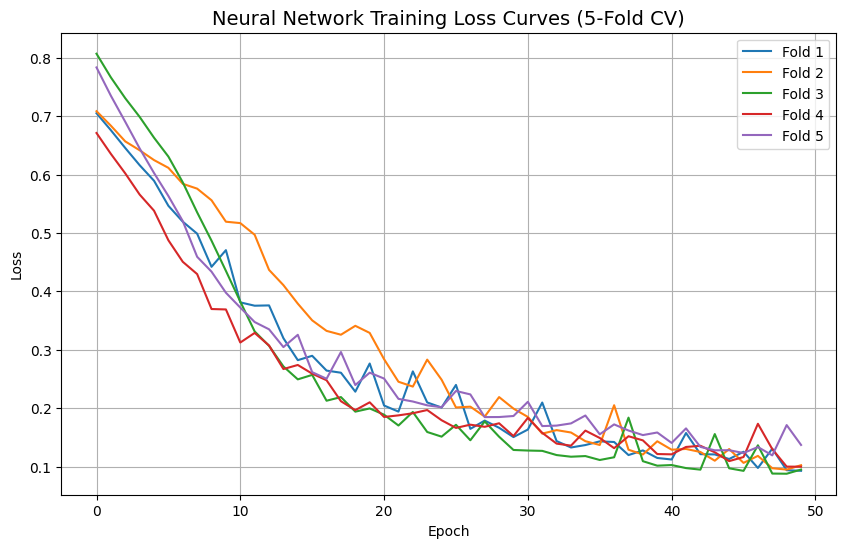

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)

class NNClassifier(nn.Module):
    def __init__(self, input_dim):
        super(NNClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
        
    def forward(self, x):
        return self.model(x)
    
def train_with_cv(X, y, epochs=50, batch_size=32, lr=0.001):

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_losses = []

    input_dim = X.shape[1]

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        print(f"\n===== Fold {fold+1} =====")

        # ---- Split data ----
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # ---- Scale INSIDE the fold (NO LEAKAGE) ----
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        # ---- Convert to tensors ----
        X_tr_t = torch.FloatTensor(X_tr)
        y_tr_t = torch.FloatTensor(y_tr.values).view(-1, 1)
        X_val_t = torch.FloatTensor(X_val)
        y_val_t = torch.FloatTensor(y_val.values).view(-1, 1)

        # ---- DataLoader ----
        train_ds = TensorDataset(X_tr_t, y_tr_t)
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

        # ---- Initialize model ----
        model = NNClassifier(input_dim)
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # ---- Train ----
        losses = []

        for epoch in range(epochs):
            model.train()
            epoch_loss = 0

            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            losses.append(epoch_loss / len(train_loader))

            if (epoch+1) % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs} - Loss: {losses[-1]:.4f}")

        # ---- Evaluate on validation fold ----
        model.eval()
        with torch.no_grad():
            val_logits = model(X_val_t)
            val_probs = torch.sigmoid(val_logits)
            val_preds = (val_probs > 0.5).float()
            acc = (val_preds.eq(y_val_t).sum() / len(y_val_t)).item()

        print(f"Validation Accuracy: {acc:.4f}")

        fold_accuracies.append(acc)
        fold_losses.append(losses)

    return fold_accuracies, fold_losses

accuracies, losses = train_with_cv(X_train, y_train, epochs=50, batch_size=32, lr=0.001)

print("\nAverage CV Accuracy:", np.mean(accuracies))

plt.figure(figsize=(10, 6))
for i, loss_curve in enumerate(losses):
    plt.plot(loss_curve, label=f"Fold {i+1}")

plt.title("Neural Network Training Loss Curves (5-Fold CV)", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()